<a href="https://colab.research.google.com/github/kmsaleh/Inheritance-in-ML-projects/blob/main/explained_variance_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_features=50000)
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

In [3]:
X.shape

(18846, 50000)

In [4]:
y.shape

(18846,)

In [5]:
# Fit LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X.toarray(), y)

LinearDiscriminantAnalysis()

In [6]:
# Access eigenvalues (scaling factors for components)
eigenvalues = lda.explained_variance_ratio_

# Compute cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(eigenvalues)



In [7]:
# Display results
print("Explained Variance Ratio:", eigenvalues)
print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio)


Explained Variance Ratio: [0.16219532 0.07074777 0.06310461 0.05687124 0.05588518 0.05405238
 0.05207488 0.05183444 0.04966672 0.04822663 0.04645037 0.04413222
 0.04237012 0.03938919 0.03676781 0.03477724 0.03393226 0.03300379
 0.02451783]
Cumulative Explained Variance Ratio: [0.16219532 0.2329431  0.2960477  0.35291894 0.40880412 0.4628565
 0.51493138 0.56676582 0.61643254 0.66465917 0.71110954 0.75524176
 0.79761188 0.83700107 0.87376888 0.90854612 0.94247838 0.97548217
 1.        ]


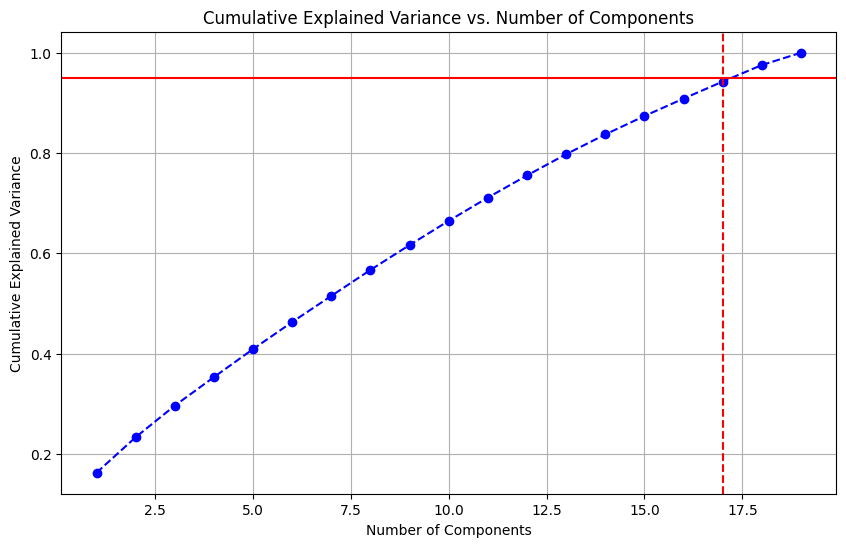

In [1]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance_ratio = [
    0.16219532, 0.07074777, 0.06310461, 0.05687124, 0.05588518, 0.05405238,
    0.05207488, 0.05183444, 0.04966672, 0.04822663, 0.04645037, 0.04413222,
    0.04237012, 0.03938919, 0.03676781, 0.03477724, 0.03393226, 0.03300379,
    0.02451783
]

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=17, color='r', linestyle='--')  # Example for 95% variance
plt.grid()
plt.show()


This plot helps visually identify the "elbow point" or the number of components required to meet threshold  (selected 95% threshold).

